## Train a perceptron via scikit-learn

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, [2,3]]
y = iris.target

In [4]:
#different class labels (flower class names already stored as integers)
np.unique(y)

array([0, 1, 2])

In [5]:
from sklearn.cross_validation import train_test_split

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
#Standardize the features 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
#train a perceptron model
from sklearn.linear_model import Perceptron

In [13]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

/data/bergeric/miniconda3/envs/s2rnai/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [14]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [15]:
#performance metrics
from sklearn.metrics import accuracy_score

In [16]:
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [17]:
#plot decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [18]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    #plot all samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1, 0], y=X[y == c1, 1],
                   alpha=0.8, c=cmap(idx),
                   marker=markers[idx], label=c1)
    
    #highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
                   alpha=1.0, linewidths=1, marker='o', edgecolor='black',
                   s=55, label='test set')

In [19]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

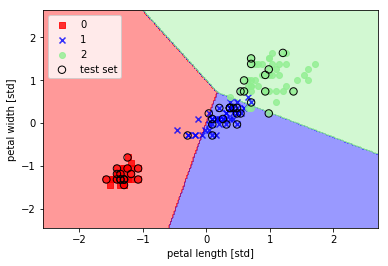

In [20]:
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

## Training a logistic regression model with scikit-learn

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression(C=1000.0, random_state=0)

In [23]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

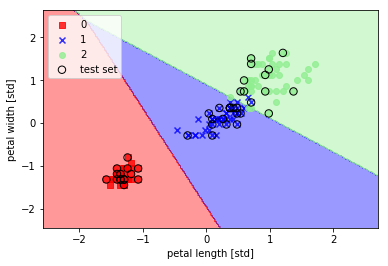

In [24]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

In [25]:
#lr.predict_proba(X_test_std[0,:])

## SVM 

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)

In [27]:
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

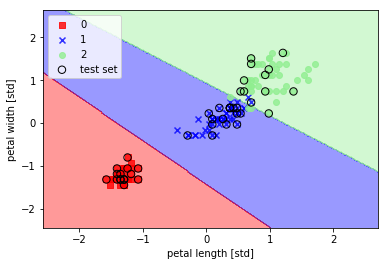

In [28]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

In [29]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)

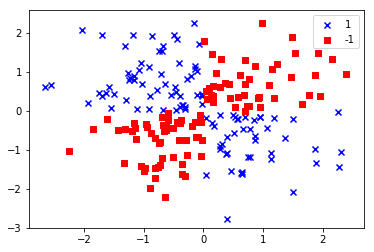

In [30]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor== 1,1], c='b', marker='x',label='1')
plt.scatter(X_xor[y_xor ==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [31]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

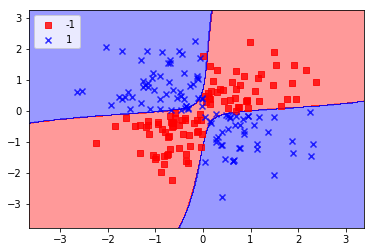

In [32]:
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [41]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

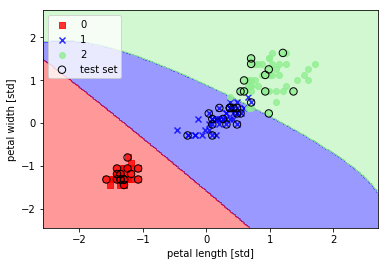

In [42]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

In [43]:
#increase value of gamma and observe effect on decision boundary
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

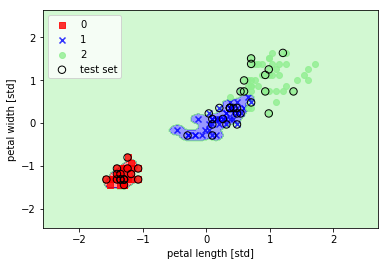

In [44]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc='upper left')
plt.show()

## Decision trees

In [33]:
from sklearn.tree import DecisionTreeClassifier
#use entropy as impurity measure
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [35]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

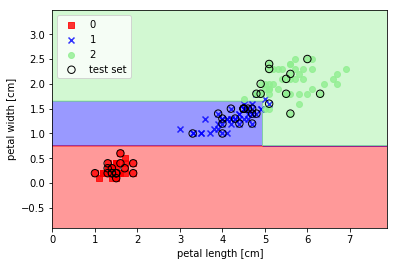

In [36]:
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## Random forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
#train random forest from 10 decision trees, use entropy as impurity measure to split nodes, n_jobs to parallelize
forest=RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

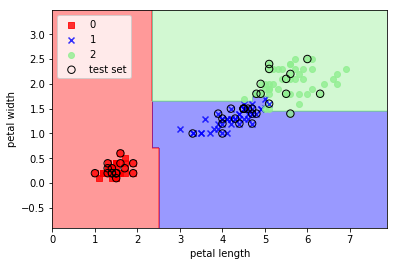

In [38]:
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## k-nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
#minkowski distance is generalization of Euclidean and Manhatten distance-- becomes Euclidean if p=2, Manhattan p=1
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

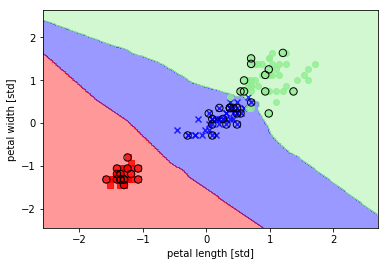

In [40]:
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.show()